In [69]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [70]:
transactions_im = pd.read_csv('transactions_cluster0.csv', header=0)

In [71]:
transactions = transactions_im.fillna(0)

In [72]:
transactions['date'] = pd.to_datetime(transactions['date'], format = '%Y-%m-%d')
transactions = transactions.set_index('date')

In [73]:
ts = transactions.mean(axis=1)
ts.head()

date
2013-01-01    3111.4
2013-01-02    3111.4
2013-01-03    2565.2
2013-01-04    2752.8
2013-01-05    3357.6
dtype: float64

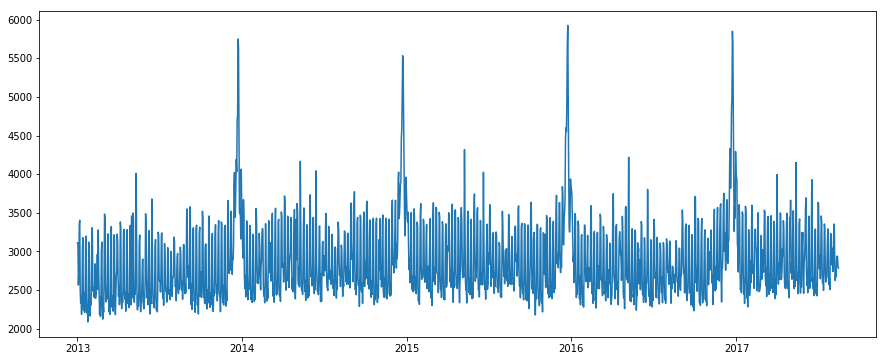

In [74]:
plt.plot(ts.index.to_pydatetime(), ts.values)

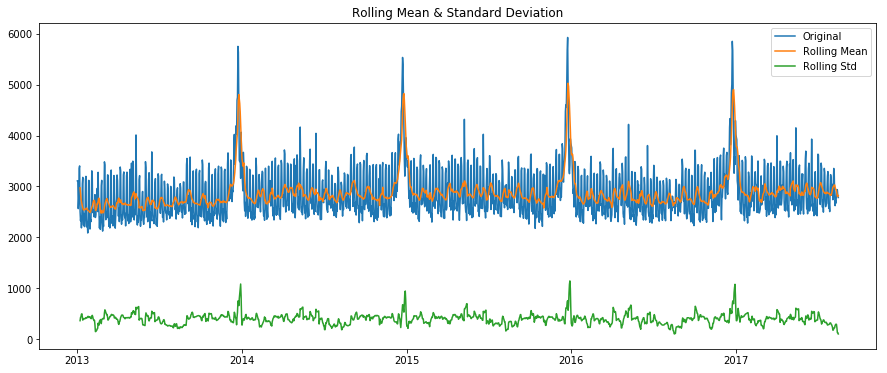

In [75]:
rolmean = ts.rolling(window=7).mean()
rolstd = ts.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [76]:
test = adfuller(ts, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-6.71078696184
P Value: 		3.68529991502e-09
Lags Used: 		23
Observations: 		1664
Critical Value 1%: 	-3.43428594737
Critical Value 5%: 	-2.86327849695
Critical Value 10%: 	-2.56769553371
Information Criterion: 	22799.885627


In [77]:
ts_log = np.log(ts)

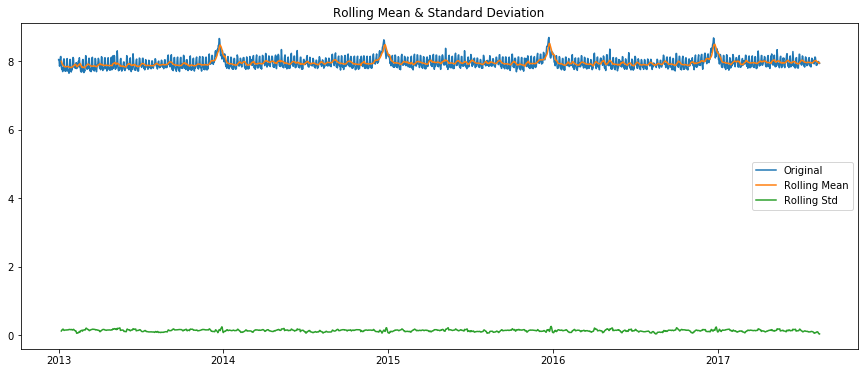

In [78]:
rolmean = ts_log.rolling(window=7).mean()
rolstd = ts_log.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [79]:
test = adfuller(ts_log, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-6.96159132741
P Value: 		9.13497926572e-10
Lags Used: 		22
Observations: 		1665
Critical Value 1%: 	-3.43428357978
Critical Value 5%: 	-2.86327745188
Critical Value 10%: 	-2.56769497723
Information Criterion: 	-4030.53708756


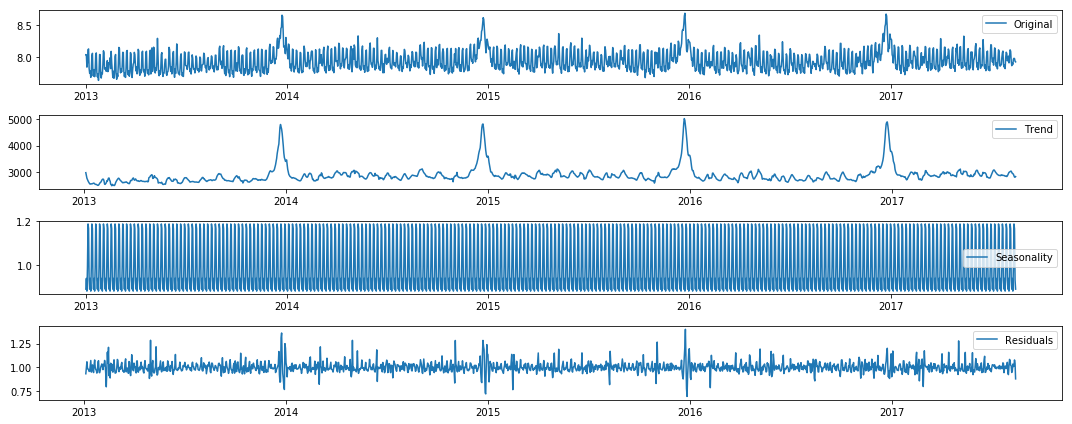

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

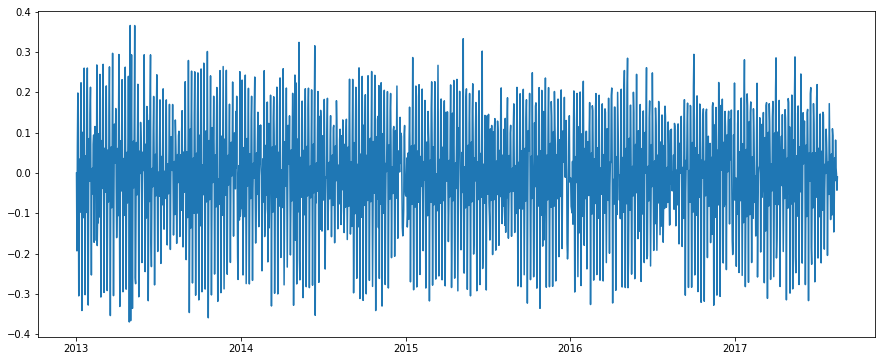

In [81]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)

In [82]:
ts_log_diff.dropna(inplace=True)

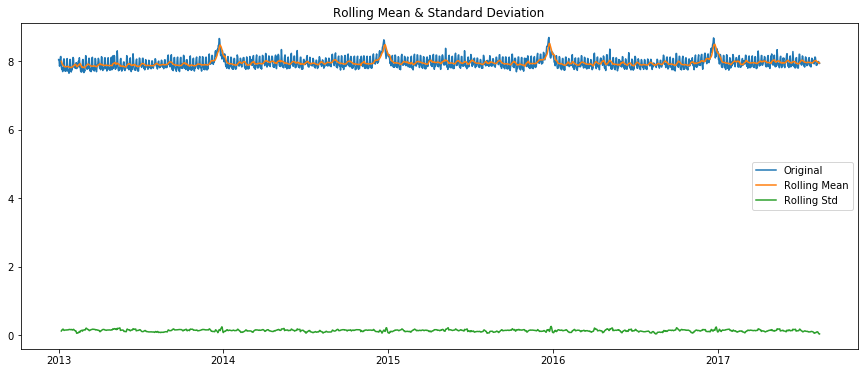

In [83]:
rolmean = ts_log.rolling(window=7).mean()
rolstd = ts_log.rolling(window=7).std()

#Plot rolling statistics:
orig = plt.plot(ts_log, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [84]:
test = adfuller(ts, autolag='AIC')
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-6.71078696184
P Value: 		3.68529991502e-09
Lags Used: 		23
Observations: 		1664
Critical Value 1%: 	-3.43428594737
Critical Value 5%: 	-2.86327849695
Critical Value 10%: 	-2.56769553371
Information Criterion: 	22799.885627


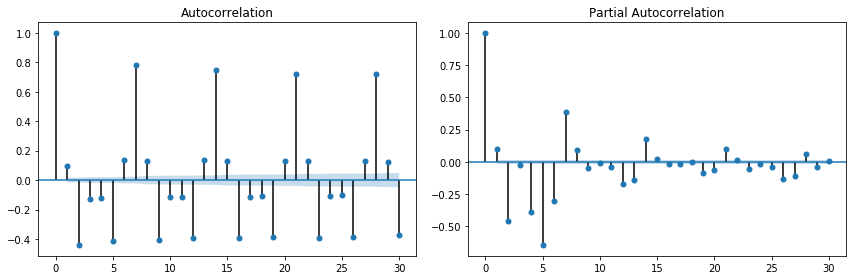

In [85]:
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(ts_log_diff, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(ts_log_diff, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

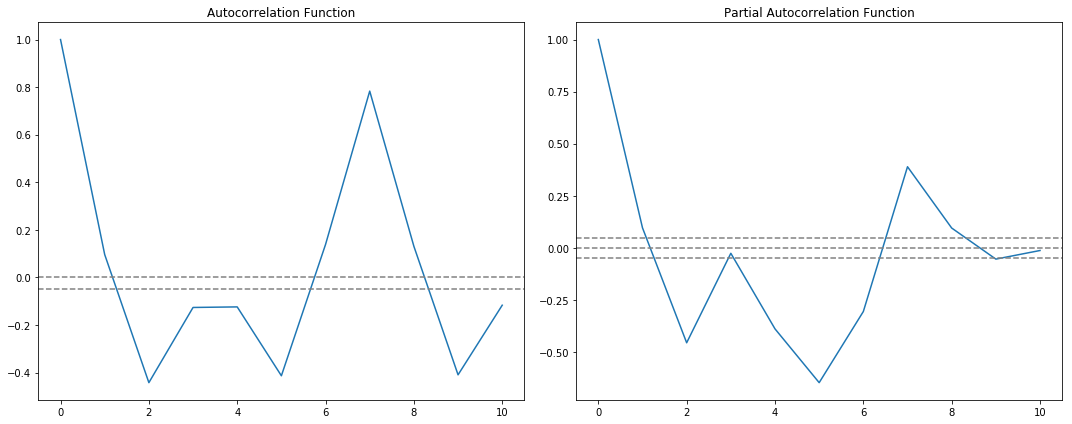

In [86]:
#ACF and PACF plots

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [87]:
train_size = int(len(ts_log_diff) * 0.9)
test_size = len(ts_log_diff) - train_size
train, test = ts_log_diff[ts_log_diff.index[0].to_pydatetime():ts_log_diff.index[train_size].to_pydatetime()], ts_log_diff[ts_log_diff.index[train_size].to_pydatetime():ts_log_diff.index[len(ts_log_diff)-1].to_pydatetime()]
print(len(train), len(test))

1519 169


In [88]:
model = ARIMA(ts_log_diff[:1181], order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [89]:
predictions=results_ARIMA.predict(start=ts_log_diff.index[1150],end=ts_log_diff.index[1686])

Text(0.5,1,'RSS: nan')

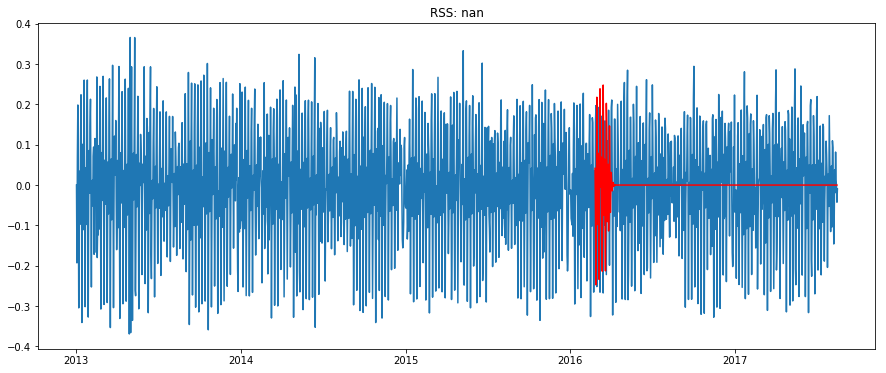

In [90]:
plt.plot(ts_log_diff.index.to_pydatetime(), ts_log_diff.values)
plt.plot(ts_log_diff.index[1149:1686].to_pydatetime(), predictions, color='red')
plt.title('RSS: %.4f'% sum((predictions-ts_log_diff)**2))

In [91]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1180
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 780.337
Method:                       css-mle   S.D. of innovations              0.125
Date:                Thu, 14 Dec 2017   AIC                          -1548.675
Time:                        19:21:53   BIC                          -1518.235
Sample:                    01-03-2013   HQIC                         -1537.199
                         - 03-27-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.002e-07    2.1e-05     -0.005      0.996   -4.13e-05    4.11e-05
ar.L1.D.y     -0.0304      0.054     -0.559      0.576      -0.137       0.076
ar.L2.D.y     -0.4587      0.028    -16.505      0.0

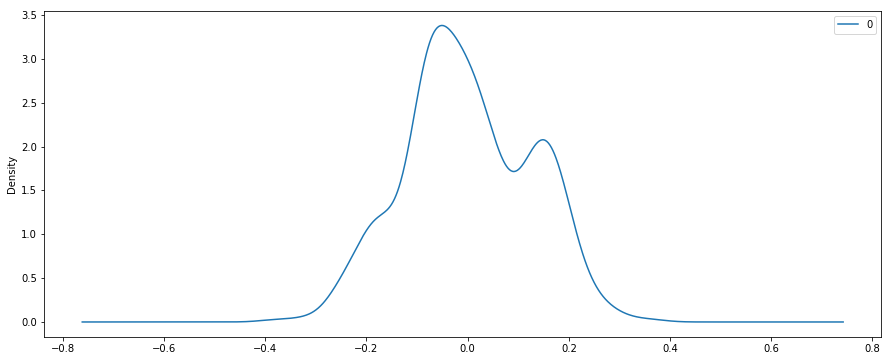

In [92]:
# plot residual errors
residuals = DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')

In [93]:
print(residuals.describe())

                 0
count  1180.000000
mean      0.000366
std       0.125056
min      -0.385861
25%      -0.083182
50%      -0.010672
75%       0.102928
max       0.366205


In [94]:
predictions_ARIMA_diff = pd.Series(predictions, copy=True)
print(predictions_ARIMA_diff.head())

2016-02-26    0.041486
2016-02-27   -0.085833
2016-02-28   -0.247573
2016-02-29   -0.081174
2016-03-01    0.217830
Freq: D, dtype: float64


In [95]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index[1150:1686])

In [96]:
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

In [97]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

Text(0.5,1,'RMSE: nan')

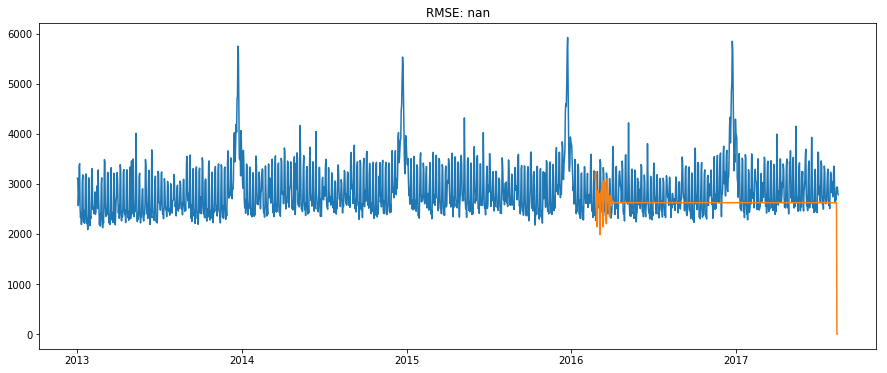

In [98]:
plt.plot(ts.index.to_pydatetime(), ts.values)
plt.plot(ts.index[1148:1686].to_pydatetime(), predictions_ARIMA.values)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts[1148:1686])**2)/test_size))

In [99]:
expected=list(ts)

In [100]:
bias=[expected[i+1148]-predictions_ARIMA[i] for i in range(len(predictions_ARIMA))]

In [101]:
mean_forcast_error=sum(bias)/len(bias)
print('Mean forcast error: %f' % mean_forcast_error)

Mean forcast error: 278.079245


In [102]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(expected[1148:1686], predictions_ARIMA)
print('MAE: %f' % mae)

MAE: 397.247459


In [103]:
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__
results_ARIMA.save('ARIMA-cluster0.pkl')